In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Logistic Regression

Logistic Regression is an algorithm used for **binary classification**.

**Contents**:

- [Linear Regression](#1.-Linear-Regression)
- [Logistic Regression](#2.-Logistic-Regression)
- [Example: The Breast Cancer Dataset](#3.-Example:-The-Breast-Cancer-Dataset)
- [Polynomial Features](#4.-Polynomial-Features)

## 1. Linear Regression

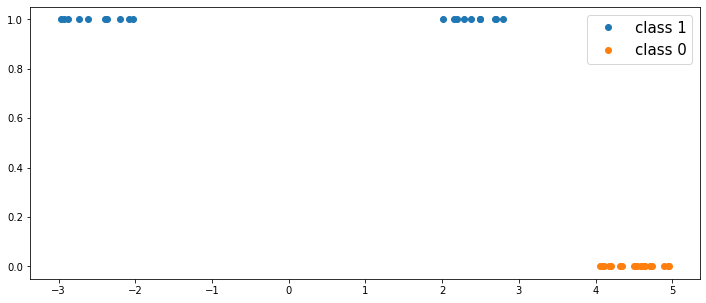

In [2]:
# toy example
x = np.zeros(40)
y = np.zeros(40)

x[0:10] = -3 + np.random.rand(10)
y[0:10] = 1

x[10:20] = 2 + np.random.rand(10)
y[10:20] = 1

x[20:40] = 4 + np.random.rand(20)
y[20:40] = 0

plt.figure(figsize=(12,5))
plt.plot(x[0:20] ,y[0:20],'o', label='class 1')
plt.plot(x[20:40],y[20:40],'o', label='class 0')
plt.legend(fontsize=15)

Let's fit a line $y=\theta_1x+\theta_0$ to the data, and use this line to classify the data points

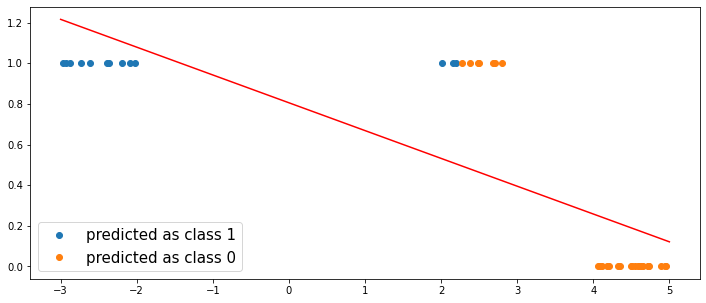

In [3]:
# matrix X
X = np.ones((40,2))
X[:,1] = x
# fit a line
theta = np.linalg.solve(X.T.dot(X),X.T.dot(y))
# class prediction
y_pred = X.dot(theta)
y_pred[y_pred>0.5] = 1
y_pred[y_pred<=0.5] = 0

# plot predictions
plt.figure(figsize=(12,5))
plt.plot(x[y_pred==1],y[y_pred==1],'o', label='predicted as class 1')
plt.plot(x[y_pred==0],y[y_pred==0],'o', label='predicted as class 0')

# plot linear regression model
x_plot = np.linspace(-3,5,100)
X_plot = np.ones((100,2))
X_plot[:,1] = x_plot
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-')

plt.legend(fontsize=15)

## 2. Logistic Regression

Logistic regression makes predictions using the formula:

$$
\mbox{prediction} \quad p = \sigma(x_1\theta_1+\theta_0) \quad \quad \mbox{where} \quad \quad 
\sigma(t) = \frac{1}{1+e^{-t}}
$$


The function $\sigma$ is called the **sigmoid function** (or logistic function)

In [4]:
'sigmoid function'
def sigmoid(t):
    return 1/(1+np.exp(-t))

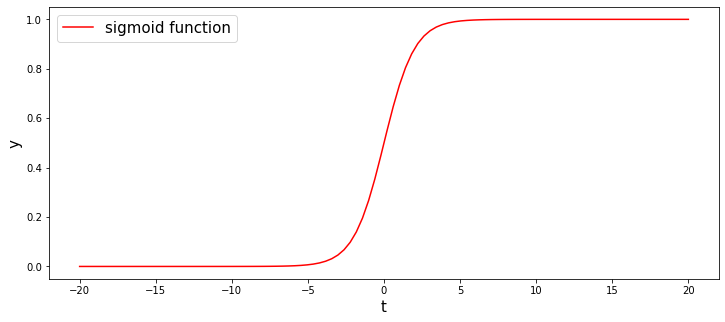

In [5]:
'plot sigmoid function'
x_sigmoid = np.linspace(-20,20,100)
y_sigmoid = sigmoid(x_sigmoid)
plt.figure(figsize=(12,5))
plt.plot(x_sigmoid,y_sigmoid,'r-', label='sigmoid function')
plt.xlabel('t',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.legend(fontsize=15)

We can transform the prediction $\widehat{y}$ to binary outcome using the rule

$$
\widehat{y} = \left\{\begin{array}{lr}
0 & \mbox { if }\quad p<0.5\\
1 & \mbox{ if }\quad p\geq 0.5
\end{array}\right.
$$

The logistic regression model is fitted using the **cost function**:

$$
E(\theta) = -\frac{1}{m}\sum_{i=1}^m\left[ y_i \log(p_i)+(1-y_i)\log(1-p_i) \right]
$$

In [6]:
'logistic regression cost function'
def logregression_cost(y,X,theta):
    m = len(y)
    p = sigmoid(X.dot(theta))
    return (-1/m)*np.sum(y*np.log(p) + (1-y)*np.log(1-p))

The **gradient** of the logistic regression model is given by

$$
\nabla E(\theta) = \frac{1}{m} X^T(\sigma(X\theta)-y)
$$

We can fit a logistic regression model using **Gradient Descent**

In [7]:
'Logistic regression with Gradient Descent'
def logregression_GD(X,y,learning_rate, n_epochs, return_cost=False):
    
    m,n = X.shape
    theta = np.random.randn(n)
    
    # initialize cost vector (only if return_cost = True)
    if return_cost:
        cost = np.zeros(n_epochs)
    
    # gradient descent steps
    for epoch in range(n_epochs):
        gradient = (1/m)*X.T.dot(sigmoid(X.dot(theta))-y) # compute gradient
        theta = theta - learning_rate*gradient # Gradient Descent Step
        if return_cost:
            cost[epoch] = logregression_cost(y,X,theta) # compute the cost function
            
    results = {}
    results['theta'] = theta
    if return_cost:
        results['cost'] = cost
        
    return results

In [8]:
# gradient descent
results = logregression_GD(X,y, 
                           learning_rate=1,
                           n_epochs = 500,
                           return_cost = True
                          )

Text(0, 0.5, 'cost')

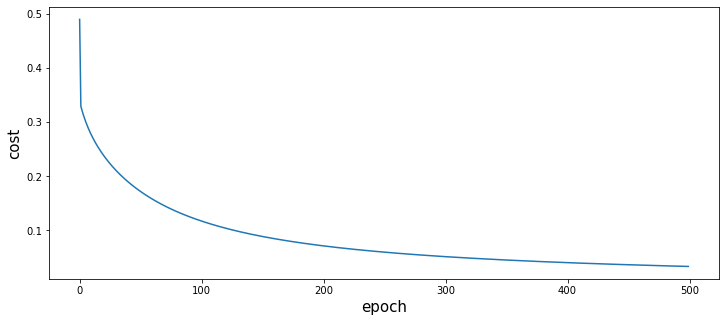

In [9]:
cost = results['cost']
plt.figure(figsize=(12,5))
plt.plot(cost)
plt.xlabel('epoch', fontsize=15)
plt.ylabel('cost', fontsize=15)

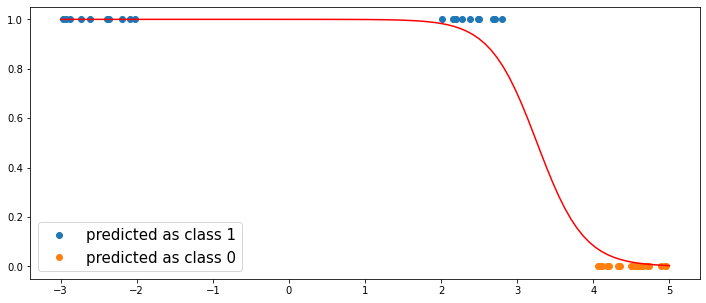

In [10]:
# plot results
plt.figure(figsize=(12,5))

# class predictions
theta = results['theta']
p = sigmoid(X.dot(theta))
p[p>0.5]=1
p[p<=0.5]=0

# plot data points
plt.plot(x[p==1],y[p==1],'o', label='predicted as class 1')
plt.plot(x[p==0],y[p==0],'o', label='predicted as class 0')

# plot logistic regression model
y_plot = sigmoid(X_plot.dot(theta))
plt.plot(x_plot,y_plot,'r-')

plt.legend(fontsize=15)

## 3. Example: The Breast Cancer Dataset

In [11]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/cancer.csv'
data = pd.read_csv(url)
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [12]:
data.shape

(569, 12)

**Attribute information**

| Label | Description |
| :- | -: |
| id | ID number |
| diagnosis |  M = malignant, B = benign |

Ten real-valued features are computed for each cell nucleus. 
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 
They describe characteristics of the cell nuclei present in the image. 
A few of the images can be found at [Web Link](http://pages.cs.wisc.edu/~olvi/uwmp/cancer.html).

| Label | Description |
| :- | -: |
| radius  |mean of distances from center to points on the perimeter |
| texture | standard deviation of gray-scale values |
| perimeter |
| area |
| smoothness | local variation in radius lengths |
| compactness | perimeter^2 / area - 1.0 |
| concavity | severity of concave portions of the contour |
| concave points | number of concave portions of the contour |
| symmetry |
| fractal dimension | coastline approximation - 1 |

In [13]:
diagnosis = data['diagnosis'].to_numpy() 
X = data.iloc[:,2:12].to_numpy()

In [14]:
# scale X (Gradient Descent works better if we scale the matrix X)
X = (X-X.mean(axis=0))/X.std(axis=0)

In [15]:
# map classes to {0,1}: M (malignant)->1, B (benign)->0
y = np.zeros(len(diagnosis))
y[diagnosis=='M']=1
y[diagnosis=='B']=0

In [16]:
# gradient descent
results = logregression_GD(X,y, 
                           learning_rate=1,
                           n_epochs = 2000,
                           return_cost = True)

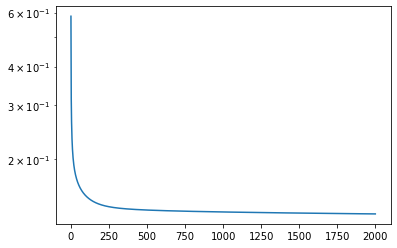

In [17]:
cost = results['cost']
plt.semilogy(cost)

In [18]:
# predictions
theta = results['theta']
p = sigmoid(X.dot(theta))
# class predictions
y_pred = np.zeros(len(y))
y_pred[p>=0.5] = 1
y_pred[p<0] = 0

## Accuracy Assessment

In [19]:
# percentage of correct classifications
100*np.sum(y==y_pred)/len(y)

93.84885764499121

In [20]:
# percentage of incorrect classification
100*np.sum(y!=y_pred)/len(y)

6.151142355008787

In [21]:
# confusion matrix
n_classes = 2
C = np.zeros((2,2))
for i in range(n_classes):
    for j in range(n_classes):
        C[i,j] = np.sum(y[y_pred==i]==j)
C

array([[340.,  18.],
       [ 17., 194.]])

## 4. Polynomial Features

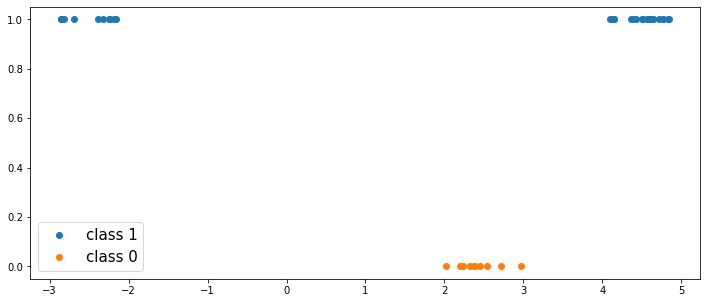

In [22]:
# toy example
x = np.zeros(40)
y = np.zeros(40)

x[0:10] = -3 + np.random.rand(10)
y[0:10] = 1

x[10:20] = 2 + np.random.rand(10)
y[10:20] = 0

x[20:40] = 4 + np.random.rand(20)
y[20:40] = 1

plt.figure(figsize=(12,5))
plt.plot(x[y==1] ,y[y==1],'o', label='class 1')
plt.plot(x[y==0],y[y==0],'o', label='class 0')
plt.legend(fontsize=15)

In [23]:
# matrix X
X = np.ones((40,2))
X[:,1] = x

In [24]:
# gradient descent
results = logregression_GD(X,y, 
                           learning_rate=0.1,
                           n_epochs = 500,
                           return_cost = True
                          )

Text(0, 0.5, 'cost')

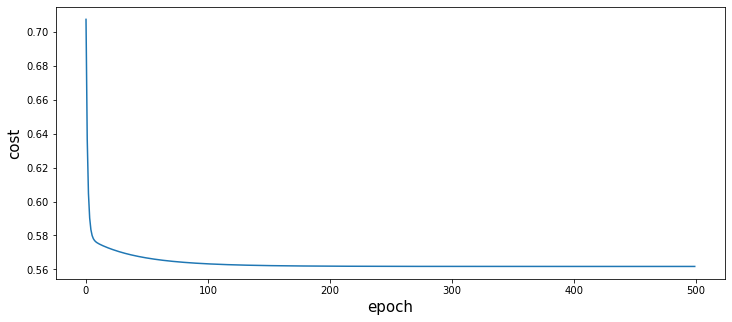

In [25]:
cost = results['cost']
plt.figure(figsize=(12,5))
plt.plot(cost)
plt.xlabel('epoch', fontsize=15)
plt.ylabel('cost', fontsize=15)

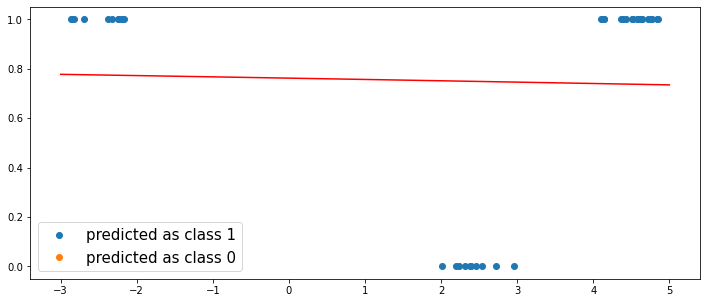

In [26]:
# plot results
plt.figure(figsize=(12,5))

theta = results['theta']
# predictions
p = sigmoid(X.dot(theta))
# class prediction
p[p>0.5]=1
p[p<=0.5]=0

# plot data points
plt.plot(x[p==1],y[p==1],'o', label='predicted as class 1')
plt.plot(x[p==0],y[p==0],'o', label='predicted as class 0')

# plot logistic regression model
theta = results['theta']
y_plot = sigmoid(X_plot.dot(theta))
plt.plot(x_plot,y_plot,'r-')

plt.legend(fontsize=15)

In [27]:
# adding polynomial features
degree = 2
X = np.ones((40,degree+1))
for i in range(degree):
    X[:,i+1]=x**(i+1)

In [28]:
# gradient descent
results = logregression_GD(X,y, 
                           learning_rate=0.1,
                           n_epochs = 500,
                           return_cost = True
                          )

Text(0, 0.5, 'cost')

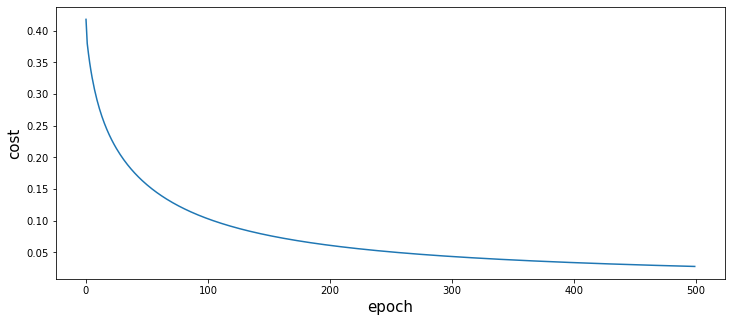

In [29]:
cost = results['cost']
plt.figure(figsize=(12,5))
plt.plot(cost)
plt.xlabel('epoch', fontsize=15)
plt.ylabel('cost', fontsize=15)

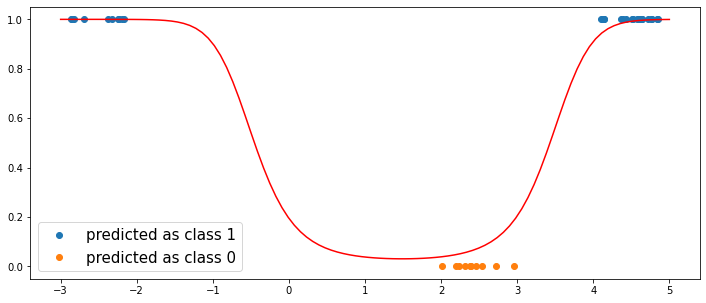

In [30]:
# plot results
plt.figure(figsize=(12,5))

theta = results['theta']
# predictions
p = sigmoid(X.dot(theta))
# class prediction
p[p>0.5]=1
p[p<=0.5]=0

# plot data points
plt.plot(x[p==1],y[p==1],'o', label='predicted as class 1')
plt.plot(x[p==0],y[p==0],'o', label='predicted as class 0')

# plot logistic regression model
X_plot = np.ones((100,degree+1))
for i in range(degree):
    X_plot[:,i+1]=x_plot**(i+1)

y_plot = sigmoid(X_plot.dot(theta))
plt.plot(x_plot,y_plot,'r-')

plt.legend(fontsize=15)